**Data Preparation, Functions**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
historical_trends = pd.read_excel("Historical_Trends.xlsx")
claims = pd.read_excel("2021_22_Claims.xlsx")

In [11]:
def trends_filter(market, service):
    return historical_trends[(historical_trends.Market == market) & 
                             (historical_trends['Type of Service'] == service)].sort_values(by = "Year").reset_index(drop = True)


def simple_plot(df, y, exclude_year = None, year_range = np.arange(2014, 2023, 1, dtype = int)):
    
    if type(exclude_year) == list:
        for i in exclude_year:
            df = df[df.Year != i]
    elif type(exclude_year) == int:
        df = df[df.Year != exclude_year]
    
    
    market = df.loc[0, 'Market']
    service = df.loc[0, "Type of Service"]
    
    title = f"Trend for {service} in {market}."
    xlabel = "Year"
    ylabel = y
    
    plt.figure(figsize = (8, 5))
    scatter = sns.scatterplot(x = "Year", y = y, data = df, s = 50)
    scatter.set(title = title, xlabel = xlabel, ylabel = ylabel)
    scatter.set_xticks(year_range)
    
    x = df['Year'].values.reshape(-1, 1)
    y = df[y].values
    model = LinearRegression().fit(x, y)
    plt.plot(year_range, model.predict(year_range.reshape(-1, 1)), color = 'black', alpha = 0.6)
    r_2 = r2_score(y, model.predict(x))
    
    plt.show()
    
    global temp_mean 
    temp_mean = np.mean(y)
    global temp_std 
    temp_std = np.std(y)
    global temp_r2 
    temp_r2 = r_2
    
    global predicted_2022
    predicted_2022 = model.predict(np.array(2022).reshape(-1, 1))
    
    print(f"Mean: {temp_mean}, SD: {temp_std}, R^2: {temp_r2}")

**Predictions: Unit Cost Percentage**

In [55]:
results_df = pd.DataFrame(columns = ['Market', 'Benefit', "Mean", "SD", "R^2", "Predicted"])

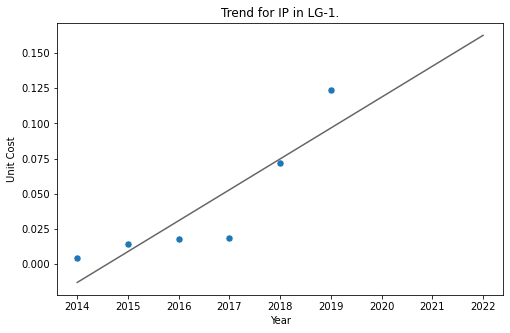

Mean: 0.0418358890989195, SD: 0.042459955034927756, R^2: 0.7788540602931857


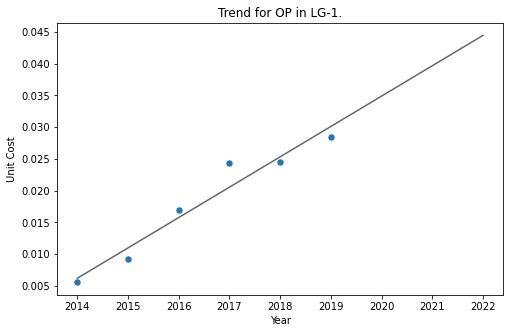

Mean: 0.018153438154825213, SD: 0.008384308621061013, R^2: 0.9471753980007782


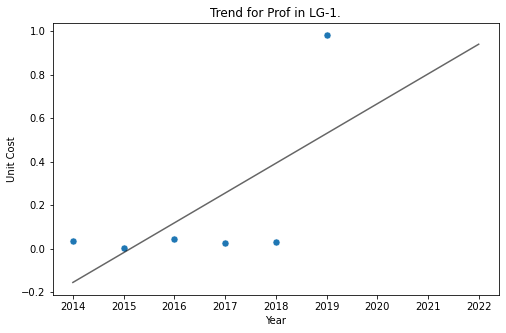

Mean: 0.18656831079485806, SD: 0.3555936208510874, R^2: 0.4333505282751189


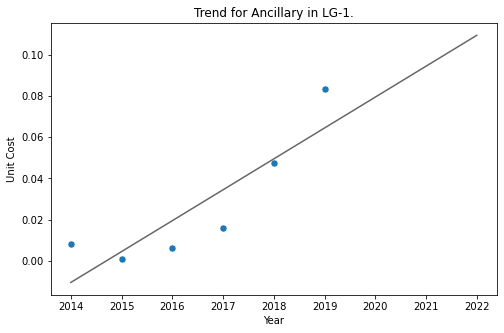

Mean: 0.027065044052329585, SD: 0.02927246277360625, R^2: 0.760380265948462


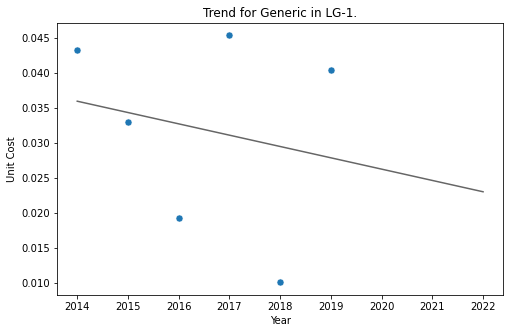

Mean: 0.03193442286803664, SD: 0.013070125873322727, R^2: 0.044850332819179606


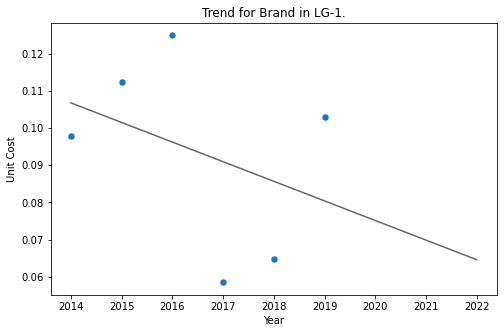

Mean: 0.09358039821775371, SD: 0.024163007256691155, R^2: 0.1388330830775416


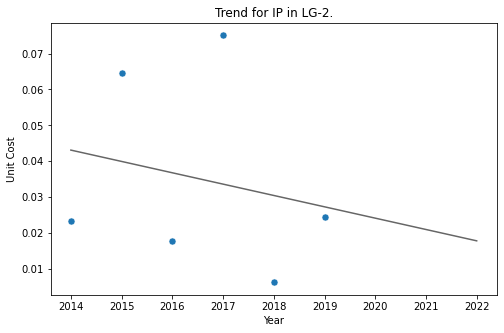

Mean: 0.035173093710423535, SD: 0.02536766655693058, R^2: 0.0454079878053667


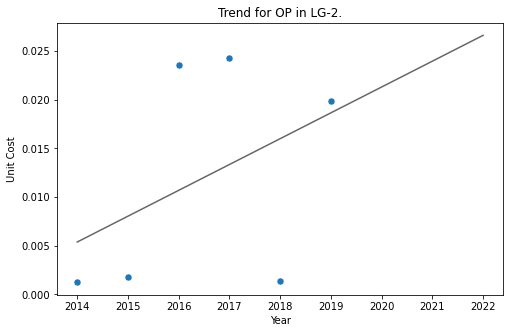

Mean: 0.012019286262261758, SD: 0.010671770025368812, R^2: 0.18059121997244187


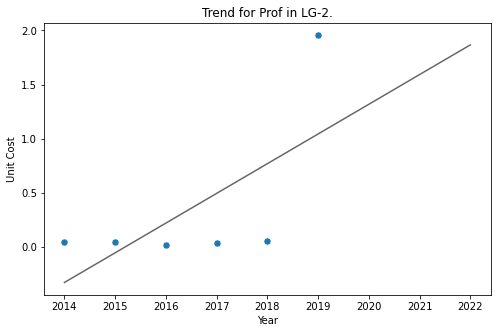

Mean: 0.35777734627576613, SD: 0.7144126351720298, R^2: 0.43033281093492104


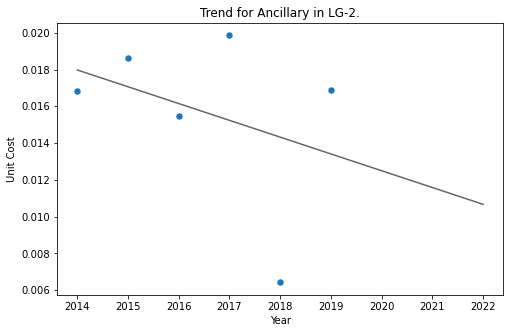

Mean: 0.01569352576266232, SD: 0.004373004659911429, R^2: 0.1271115606371458


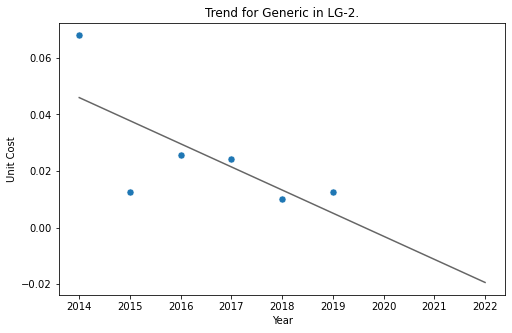

Mean: 0.02552019774942432, SD: 0.019906048839611716, R^2: 0.4910358347520277


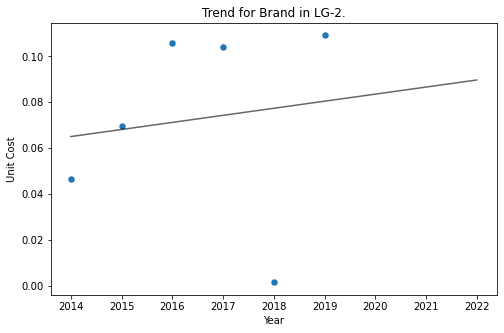

Mean: 0.0727394620994578, SD: 0.03912625264622296, R^2: 0.01807094521265873


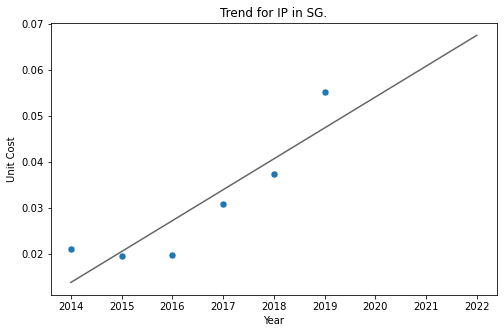

Mean: 0.030522361862544548, SD: 0.012774580508642344, R^2: 0.8057909290885449


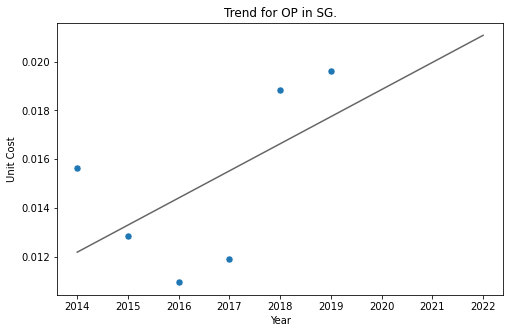

Mean: 0.014961204323731851, SD: 0.0033435540163353396, R^2: 0.32230416145406793


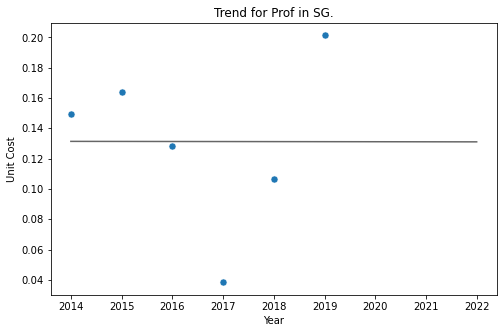

Mean: 0.1312590968681894, SD: 0.050891965357074874, R^2: 1.780870838685722e-06


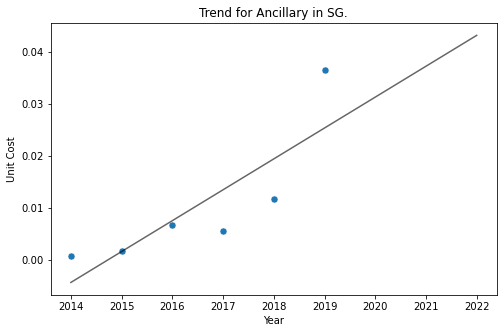

Mean: 0.010484170081438806, SD: 0.012185836301601307, R^2: 0.6920373894303201


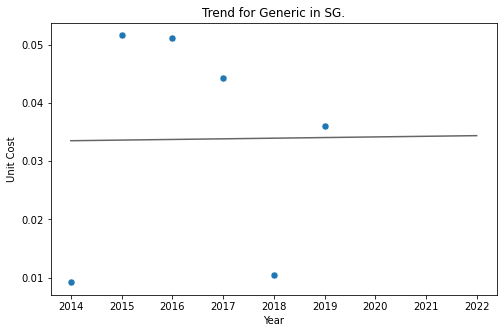

Mean: 0.03381008496861575, SD: 0.0177532010720708, R^2: 0.00011004081454435433


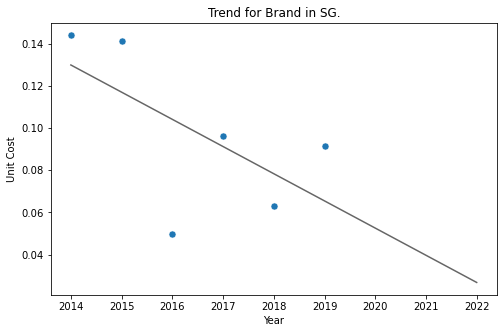

Mean: 0.09769022854002674, SD: 0.03553898224799301, R^2: 0.38379499748223755


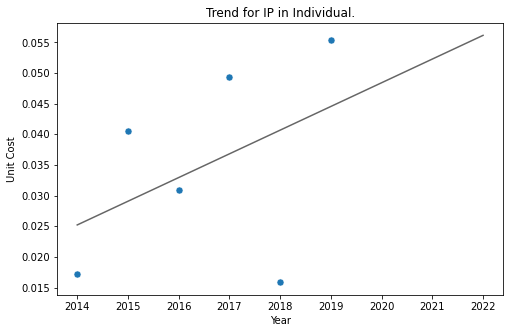

Mean: 0.03487487835087959, SD: 0.015014098978973099, R^2: 0.19338728366058222


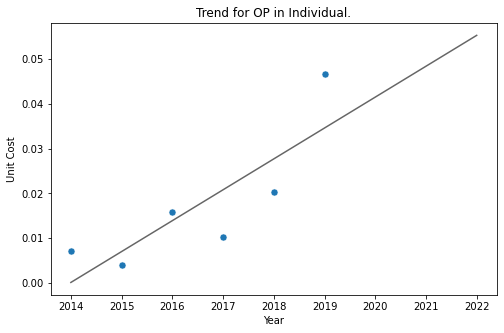

Mean: 0.017359877826278906, SD: 0.014163216114166788, R^2: 0.6896595988803302


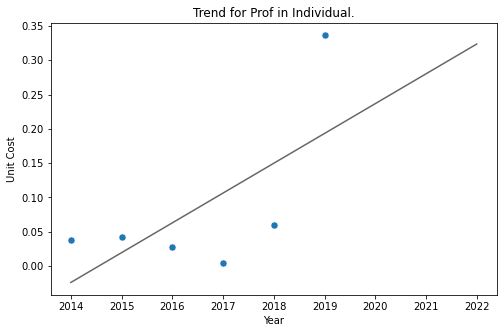

Mean: 0.08453123939725478, SD: 0.11380004195379323, R^2: 0.4256819262481951


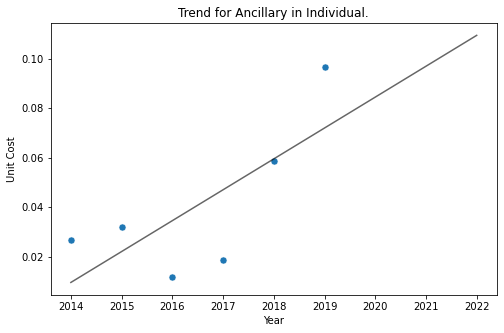

Mean: 0.04077454271676194, SD: 0.028982296798587527, R^2: 0.5404192175835953


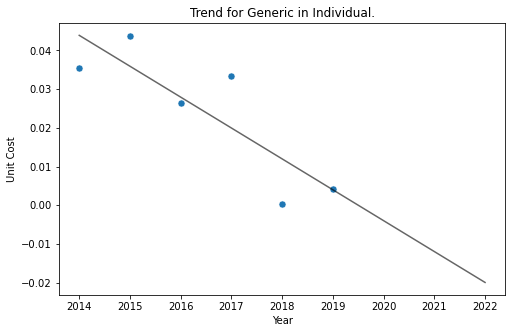

Mean: 0.02395405663037846, SD: 0.016141997073856246, R^2: 0.7131003009564344


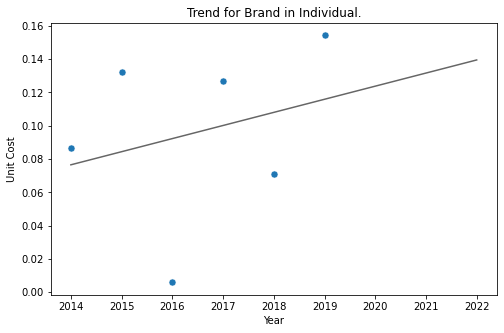

Mean: 0.09621419701642026, SD: 0.04915948601670459, R^2: 0.07477657791358794


In [56]:
markets = ["LG-1", 'LG-2', 'SG', 'Individual']
services = ['IP', 'OP', 'Prof', 'Ancillary', 'Generic', 'Brand']

for i in markets:
    for j in services:
        simple_plot(trends_filter(i, j), "Unit Cost", exclude_year = 2020)
        results_df.loc[len(results_df)] = [i, j, temp_mean, temp_std, temp_r2, predicted_2022]

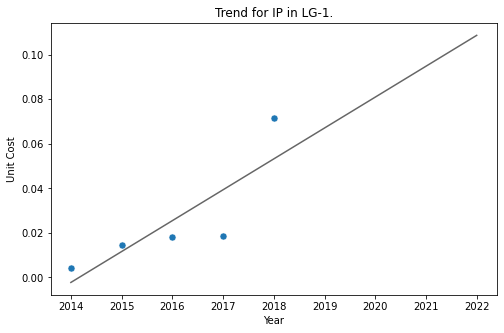

Mean: 0.025481195340969865, SD: 0.023633901294196093, R^2: 0.6883727460482045


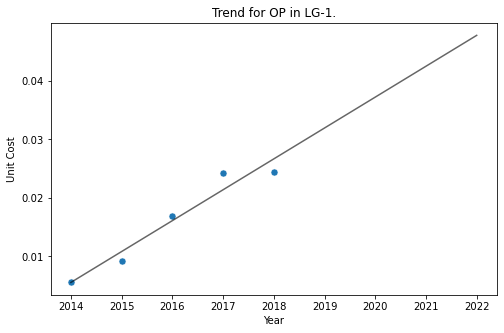

Mean: 0.016098742085620232, SD: 0.0076827925680054195, R^2: 0.9443819414910612


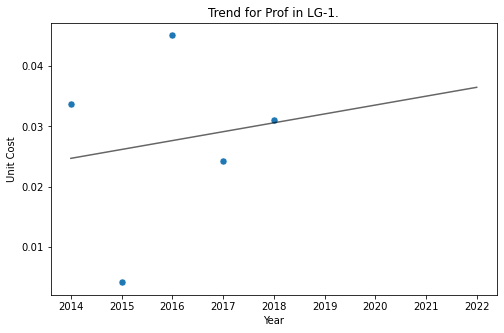

Mean: 0.027637881318462832, SD: 0.01352402849285753, R^2: 0.023633426811601743


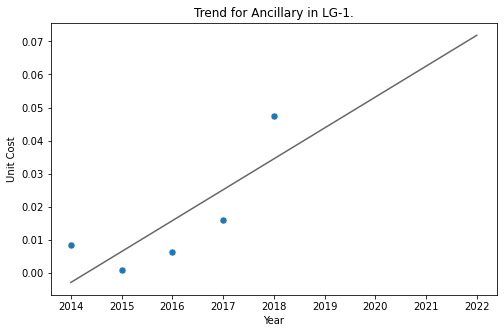

Mean: 0.01584624505463441, SD: 0.01652524694201206, R^2: 0.6372083595092533


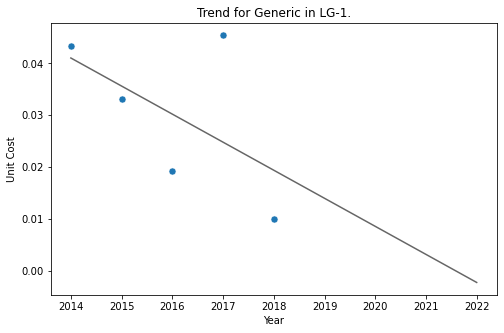

Mean: 0.0302163351973908, SD: 0.013685133428258878, R^2: 0.3129554718419981


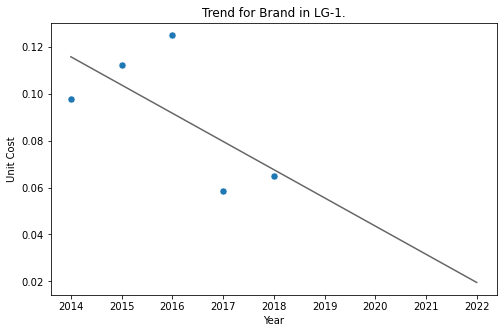

Mean: 0.09171240601553173, SD: 0.02607076397842837, R^2: 0.4256726513678344


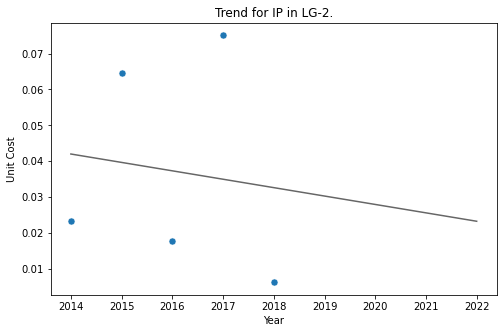

Mean: 0.037301961764425226, SD: 0.027295232783477834, R^2: 0.014772277854976146


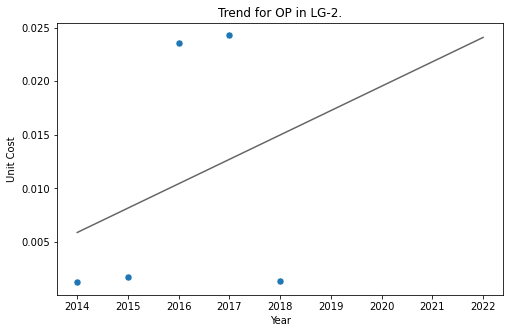

Mean: 0.010438318637398292, SD: 0.011030288245736541, R^2: 0.08512479135291018


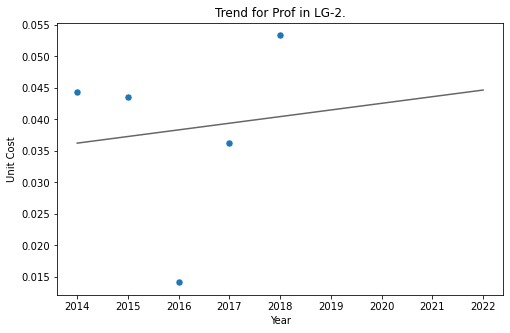

Mean: 0.038328188100887464, SD: 0.013263031339049642, R^2: 0.012597964529082128


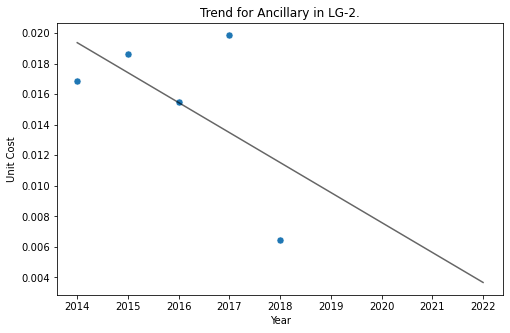

Mean: 0.015449861062885475, SD: 0.004753058887834702, R^2: 0.341165904202834


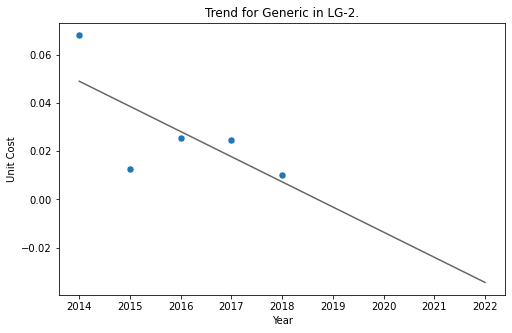

Mean: 0.028102806177698995, SD: 0.020868199220901544, R^2: 0.49860294447333076


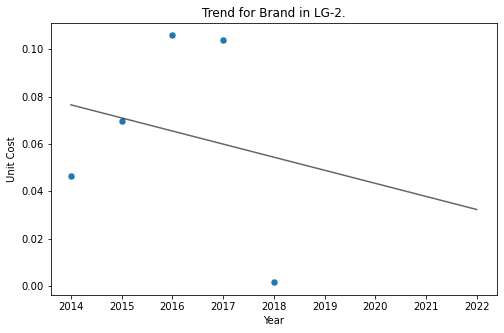

Mean: 0.06546145209544767, SD: 0.03897717021093828, R^2: 0.04022163884051133


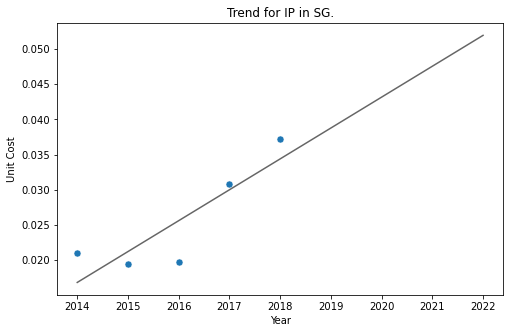

Mean: 0.025613655552803365, SD: 0.007159294853153105, R^2: 0.7510888152380938


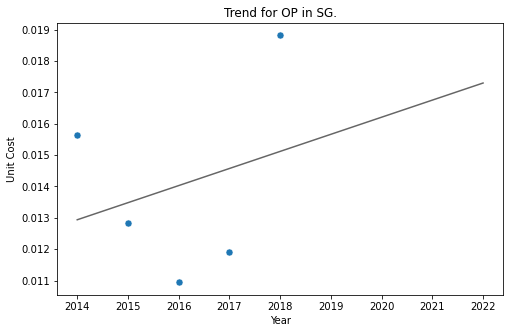

Mean: 0.014027666954484527, SD: 0.002861166201655426, R^2: 0.07250461290884458


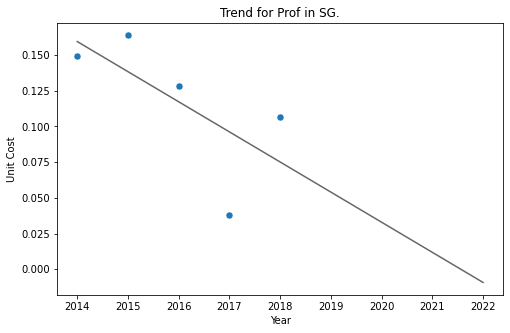

Mean: 0.11725378123570296, SD: 0.04394425297685054, R^2: 0.4601153493248661


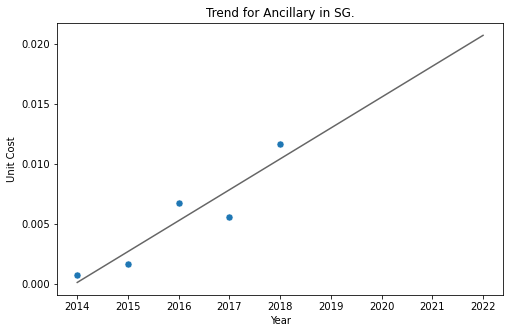

Mean: 0.0052736301049667875, SD: 0.00391090354839274, R^2: 0.8648547549483183


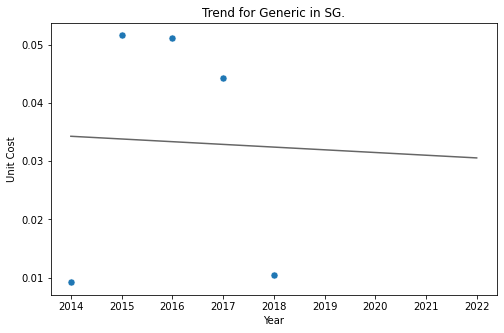

Mean: 0.03337255711489245, SD: 0.019418104805303444, R^2: 0.0011491668260391608


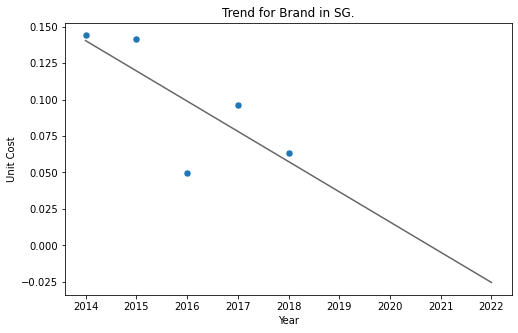

Mean: 0.0989215953100567, SD: 0.03881398622061113, R^2: 0.5695864084161663


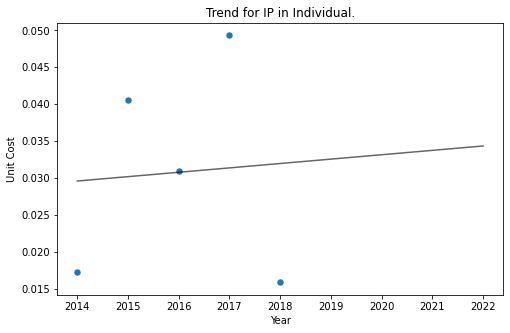

Mean: 0.030760619280511575, SD: 0.012997885812386895, R^2: 0.0041802485759999675


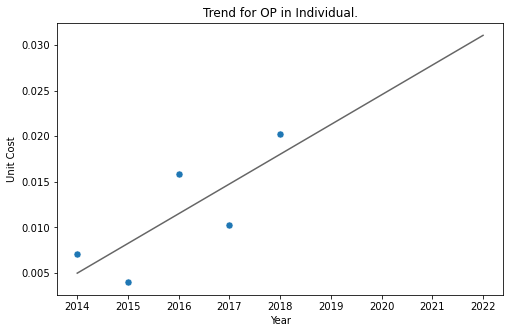

Mean: 0.011498999614976893, SD: 0.005883593152965672, R^2: 0.6144283016620319


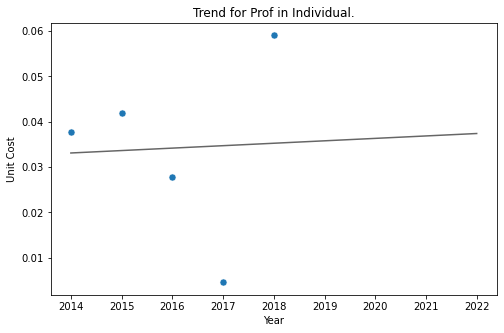

Mean: 0.034168103701111854, SD: 0.017940647578431553, R^2: 0.0017912086565535779


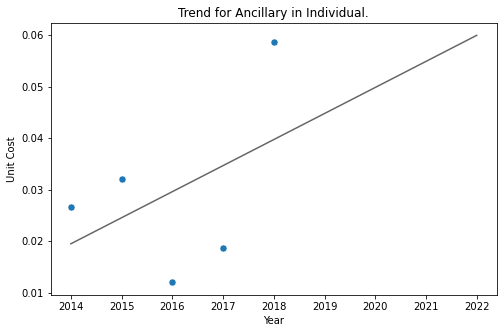

Mean: 0.029591786129530135, SD: 0.01605129165924171, R^2: 0.19858142766190223


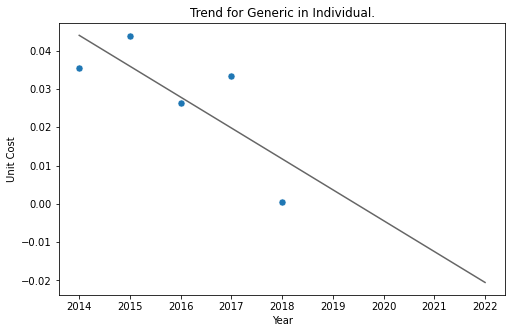

Mean: 0.027884627305247683, SD: 0.01483174192257972, R^2: 0.5923784359790665


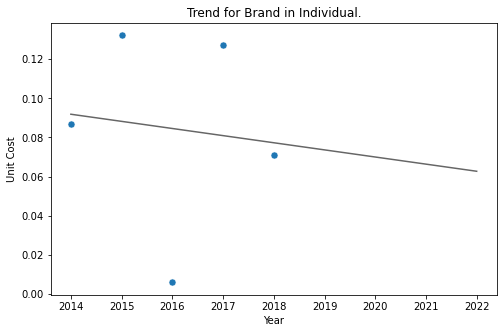

Mean: 0.08460115486687847, SD: 0.045725371411391345, R^2: 0.012707441741488856


In [57]:
remove_2019 = []
for i in markets:
    for j in services:
        simple_plot(trends_filter(i, j), "Unit Cost", exclude_year = [2019, 2020])
        remove_2019.append(temp_mean)

results_df["Mean without 2019"] = remove_2019

In [58]:
method_list = []

for i in range(len(results_df)):
    if results_df.iloc[i, 4] > 0.65:
        method_list.append("Regression")
    elif results_df.iloc[i, 1] == "Prof" or results_df.iloc[i, 1] == "Ancillary":
        method_list.append("Mean (w/o 2019)")
    else:
        method_list.append("Mean (with 2019)")

results_df["Method"] = method_list

In [59]:
prediction = []

for i in range(len(results_df)):
    if results_df.iloc[i, 7] == "Regression":
        prediction.append(results_df.iloc[i, 5][0])
    elif results_df.iloc[i, 7] == "Mean (w/o 2019)":
        prediction.append(results_df.iloc[i, 6])
    elif results_df.iloc[i, 7] == "Mean (with 2019)":
        prediction.append(results_df.iloc[i, 2])
        
results_df["Prediction"] = prediction

In [60]:
results_df

,Market,Benefit,Mean,SD,R^2,Predicted,Mean without 2019,Method,Prediction
0,LG-1,IP,0.041836,0.042460,0.778854,[0.16251354465402557],0.025481,Regression,0.162514
1,LG-1,OP,0.018153,0.008384,0.947175,[0.04443200951033077],0.016099,Regression,0.044432
2,LG-1,Prof,0.186568,0.355594,0.433351,[0.9404321586574724],0.027638,Mean (w/o 2019),0.027638
3,LG-1,Ancillary,0.027065,0.029272,0.760380,[0.10926923725485693],0.015846,Regression,0.109269
4,LG-1,Generic,0.031934,0.013070,0.044850,[0.023020232683454545],0.030216,Mean (with 2019),0.031934
5,LG-1,Brand,0.093580,0.024163,0.138833,[0.06458582245148037],0.091712,Mean (with 2019),0.093580
6,LG-2,IP,0.035173,0.025368,0.045408,[0.017764409817728755],0.037302,Mean (with 2019),0.035173
7,LG-2,OP,0.012019,0.010672,0.180591,[0.026624370425460953],0.010438,Mean (with 2019),0.012019
8,LG-2,Prof,0.357777,0.714413,0.430333,[1.8670602319183445],0.038328,Mean (w/o 2019),0.038328
9,LG-2,Ancillary,0.015694,0.004373,0.127112,[0.01067250802131281],0.015450,Mean (w/o 2019),0.015450


In [61]:
## Helper functions assuming structure of above results dataframe.

weights_market = {"Individual": 0.822922126, "LG-1": 0.048548986, "LG-2": 0.024963072, "SG" : 0.103565815}
weights_benefit = {"Ancillary": 0.0587452, "IP": 0.238562224, "OP": 0.266993126, "Prof": 0.243690035, "Generic": 0.031191566, "Brand": 0.16081785
}
weights_drug = {"Generic": 0.162448105, "Brand" : 0.837551895}

def aggregate_benefit(df, benefit):
    df = df[df.Benefit == benefit].sort_values(by = "Market").reset_index(drop = True)
    
    return (df.iloc[0, 8] * weights_market["Individual"] + df.iloc[1, 8] * weights_market["LG-1"] +
        df.iloc[2, 8] * weights_market["LG-2"] + df.iloc[3, 8] * weights_market["SG"])


def aggregate_market(df, market):
    df = df[df.Market == market].sort_values(by = "Benefit").reset_index(drop = True)
    
    return (df.iloc[0, 8] * weights_benefit["Ancillary"] + df.iloc[1, 8] * weights_benefit["Brand"] + 
           df.iloc[2, 8] * weights_benefit["Generic"] + df.iloc[3, 8] * weights_benefit["IP"] +
           df.iloc[4, 8] * weights_benefit["OP"] + df.iloc[5, 8] * weights_benefit["Prof"])

aggregate_benefit(results_df, "OP")

0.04946393570672293

In [62]:
market_results = pd.DataFrame(columns = ["Market", "Trend"])

for i in results_df.Market.unique():
    trend = aggregate_market(results_df, i)
    market_results.loc[len(market_results)] = [i, trend]
    
total = (market_results.iloc[0, 1] * weights_market["LG-1"] + market_results.iloc[1, 1] * weights_market["LG-2"] +
         market_results.iloc[2, 1] * weights_market["SG"] + market_results.iloc[3, 1] * weights_market["Individual"])

market_results.loc[len(market_results)] = ["Total", total]

market_results

,Market,Trend
0,LG-1,0.079832
1,LG-2,0.034342
2,SG,0.067958
3,Individual,0.047984
4,Total,0.051258


In [63]:
benefit_results = pd.DataFrame(columns = ["Benefit", "Trend"])

for i in results_df.Benefit.unique():
    trend = aggregate_benefit(results_df, i)
    benefit_results.loc[len(benefit_results)] = [i, trend]
    
drugs = benefit_results.iloc[4, 1] * weights_drug["Generic"] + benefit_results.iloc[5, 1] * weights_drug["Brand"]
benefit_results.loc[len(benefit_results)] = ["Drugs", drugs]

total = (benefit_results.iloc[0, 1] * weights_benefit["IP"] + benefit_results.iloc[1, 1] * weights_benefit["OP"] +
        benefit_results.iloc[2, 1] * weights_benefit["Prof"] + benefit_results.iloc[3, 1] * weights_benefit["Ancillary"] + 
        benefit_results.iloc[4, 1] * weights_benefit["Generic"] + benefit_results.iloc[5, 1] * weights_benefit["Brand"])

benefit_results.loc[len(benefit_results)] = ["Total", total]
    
benefit_results

,Benefit,Trend
0,IP,0.044453
1,OP,0.049464
2,Prof,0.042560
3,Ancillary,0.034509
4,Generic,-0.010724
5,Brand,0.095653
6,Drugs,0.078372
7,Total,0.051258


**Predictions: Utilization Percentage**

In [38]:
results_df = pd.DataFrame(columns = ['Market', 'Benefit', "Mean", "SD", "R^2", "Predicted"])

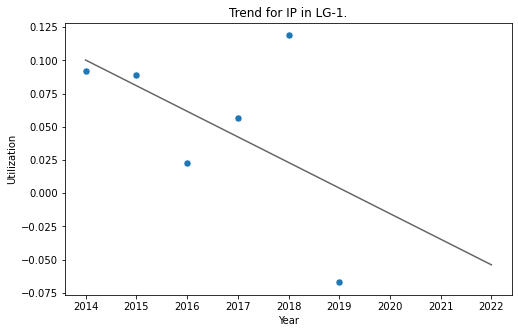

Mean: 0.052094366632175045, SD: 0.06133592690183724, R^2: 0.28825256212686046


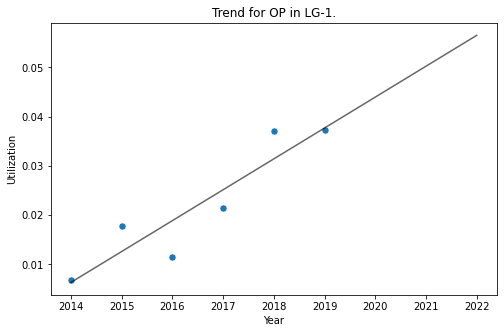

Mean: 0.022011729137063882, SD: 0.011667275146548408, R^2: 0.8419076893043591


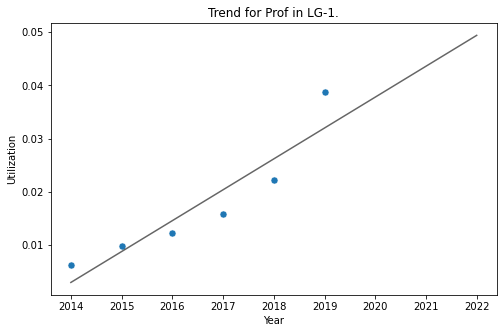

Mean: 0.017468177366370245, SD: 0.010728801169954384, R^2: 0.8546425113601657


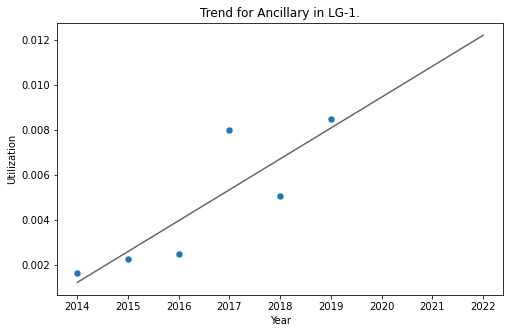

Mean: 0.004653309214192053, SD: 0.0027561096658656895, R^2: 0.7238267013522652


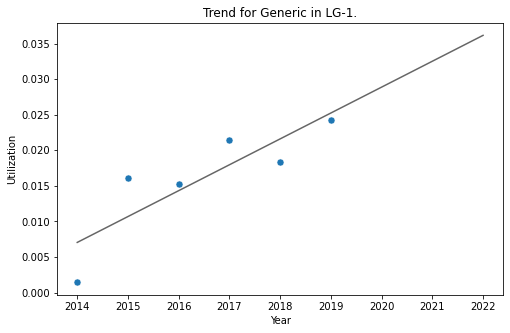

Mean: 0.0161460574970819, SD: 0.0072650794531772, R^2: 0.7310146148943091


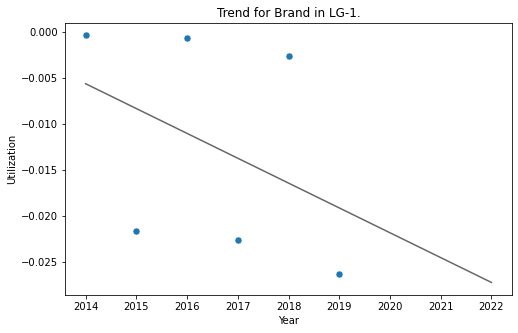

Mean: -0.012378207411108177, SD: 0.011282579925915926, R^2: 0.16695821819212442


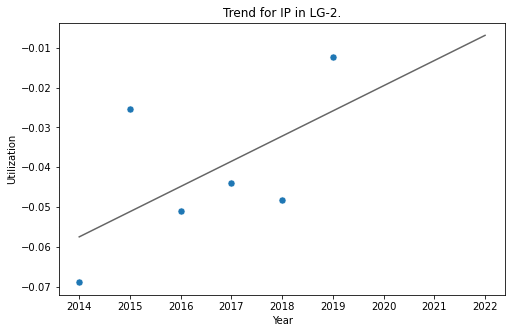

Mean: -0.04168104837944695, SD: 0.018259896514036873, R^2: 0.3500954032287804


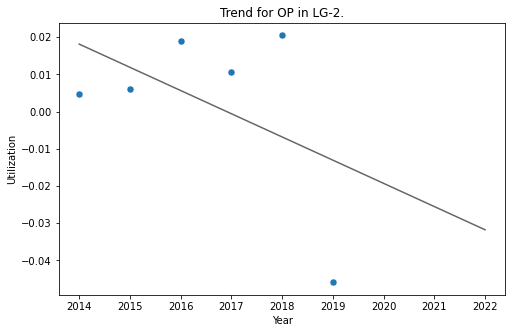

Mean: 0.002531719007559547, SD: 0.02246737500463174, R^2: 0.22471475155917986


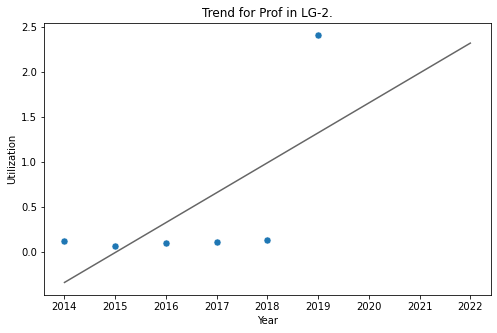

Mean: 0.4891796347498629, SD: 0.8572223191290642, R^2: 0.4394164802496081


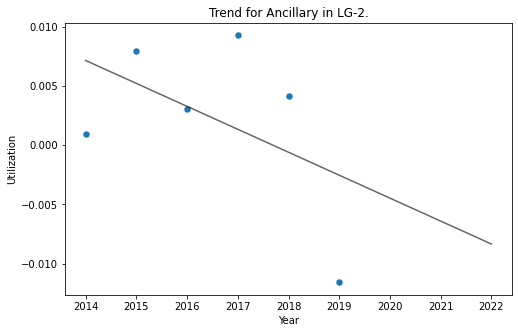

Mean: 0.0023078724357551046, SD: 0.006828808271685791, R^2: 0.23476497626745751


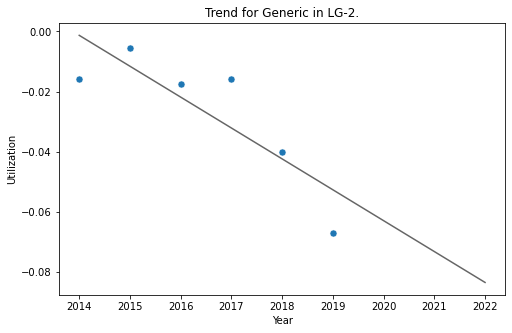

Mean: -0.026995042624127247, SD: 0.020813306718386708, R^2: 0.7110280462968774


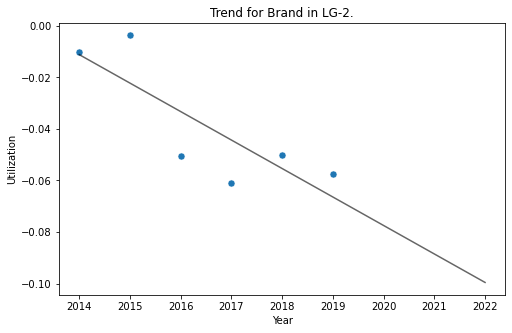

Mean: -0.03879547999377666, SD: 0.022974140661321304, R^2: 0.6751364772847315


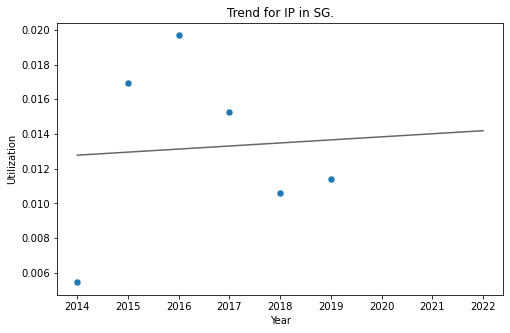

Mean: 0.013220549425153563, SD: 0.004663059735168674, R^2: 0.004158844126965655


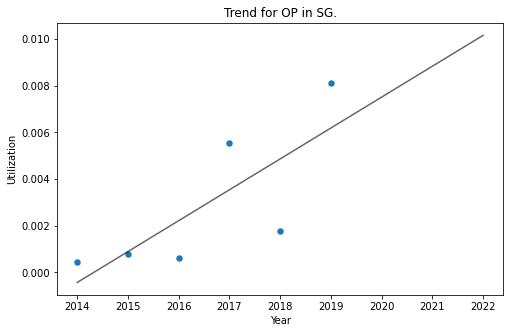

Mean: 0.0028781229493296096, SD: 0.0029257550121753986, R^2: 0.5984575960863255


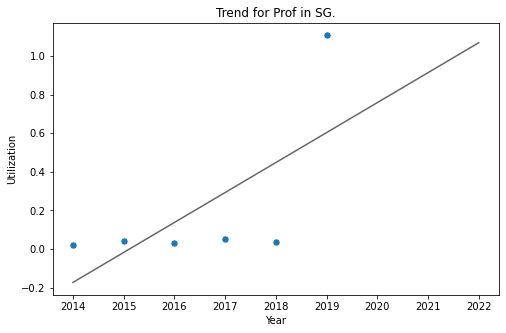

Mean: 0.21504574348599567, SD: 0.39912492867266947, R^2: 0.4412932095895067


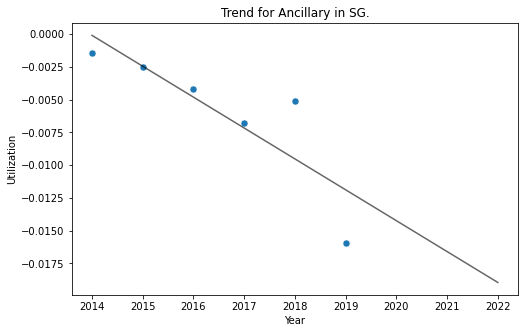

Mean: -0.005991298762121261, SD: 0.004752825398404049, R^2: 0.7167017645620362


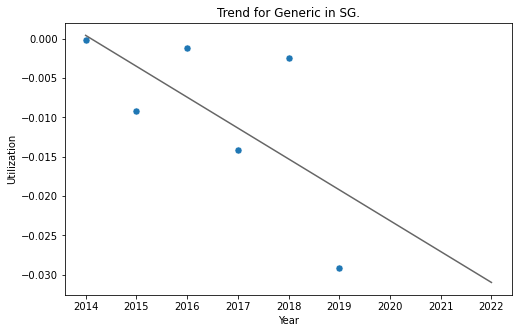

Mean: -0.009375379941436463, SD: 0.010105882225028132, R^2: 0.44060732462626695


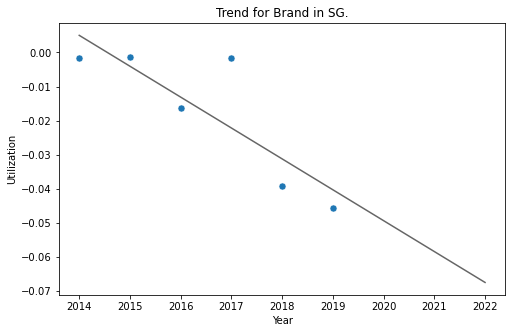

Mean: -0.017645835876003418, SD: 0.018322514451940598, R^2: 0.7150536813432294


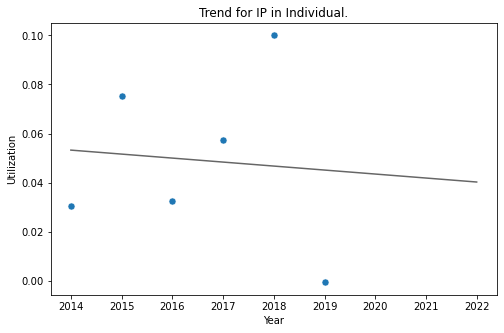

Mean: 0.04918116607491236, SD: 0.03283439338118642, R^2: 0.00715525676681894


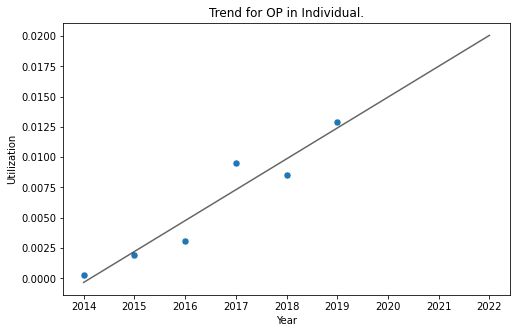

Mean: 0.006035418932059544, SD: 0.004543355913185698, R^2: 0.9183840424044033


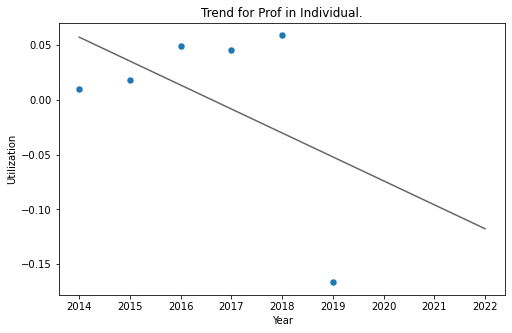

Mean: 0.002709039135416702, SD: 0.07769862223326307, R^2: 0.2312905124500213


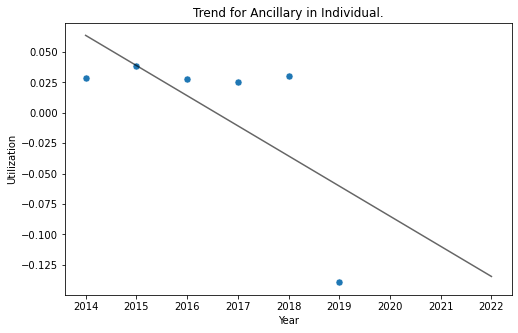

Mean: 0.00174760408596919, SD: 0.06327687900683021, R^2: 0.44724326731924424


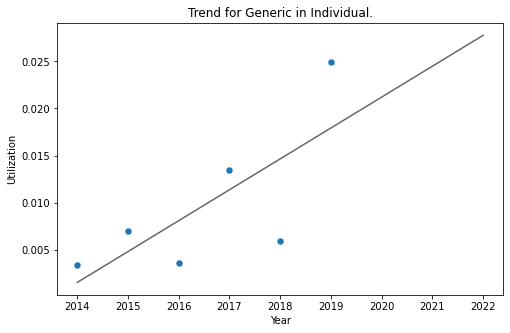

Mean: 0.009723938110227127, SD: 0.00758694490092444, R^2: 0.5452697269000399


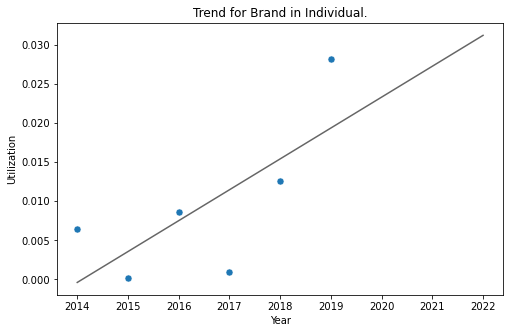

Mean: 0.009494475970129097, SD: 0.009396706178034696, R^2: 0.5152753046824003


In [39]:
markets = ["LG-1", 'LG-2', 'SG', 'Individual']
services = ['IP', 'OP', 'Prof', 'Ancillary', 'Generic', 'Brand']

for i in markets:
    for j in services:
        simple_plot(trends_filter(i, j), "Utilization", exclude_year = 2020)
        results_df.loc[len(results_df)] = [i, j, temp_mean, temp_std, temp_r2, predicted_2022]

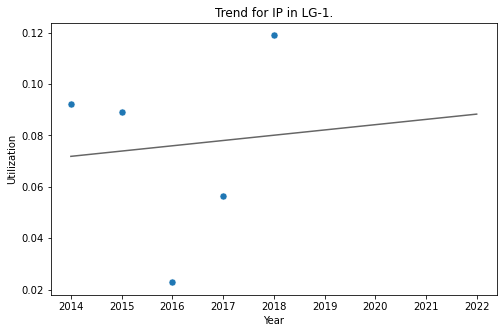

Mean: 0.07595875137235114, SD: 0.0331279634225548, R^2: 0.007678075429296438


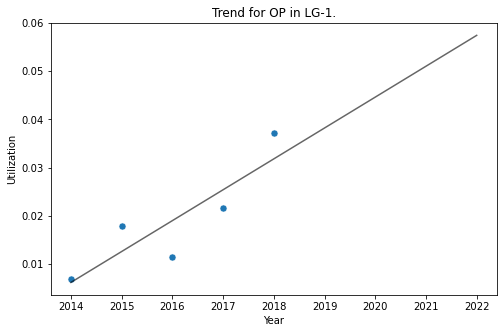

Mean: 0.018975007449328236, SD: 0.010393281462643799, R^2: 0.7618536217435118


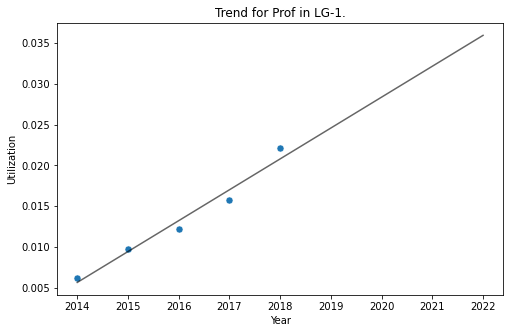

Mean: 0.013215909382580753, SD: 0.005444071217161896, R^2: 0.966737889078561


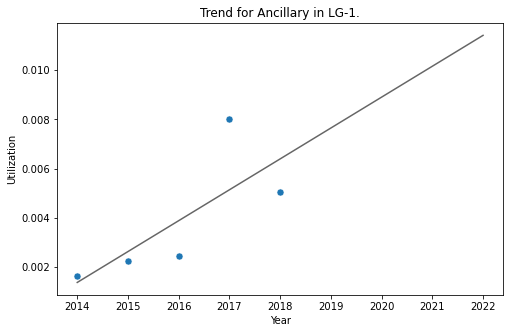

Mean: 0.0038874988244065184, SD: 0.002365708196230697, R^2: 0.561986666761795


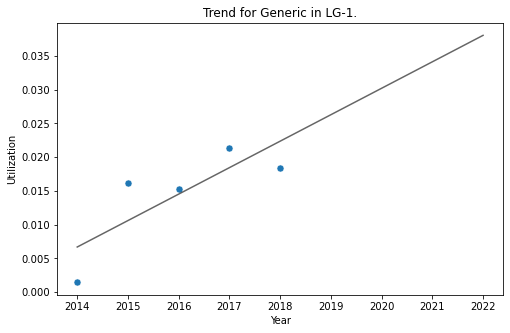

Mean: 0.014515112220779117, SD: 0.006883150469618321, R^2: 0.6482047291949422


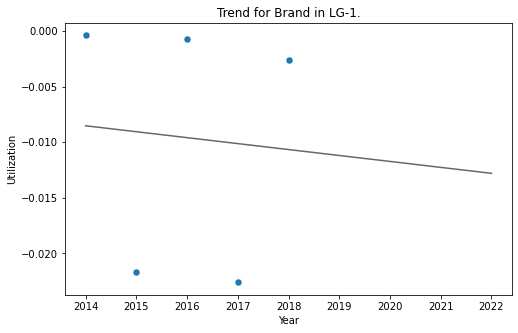

Mean: -0.00958564589583877, SD: 0.010293956131742284, R^2: 0.005404772482692111


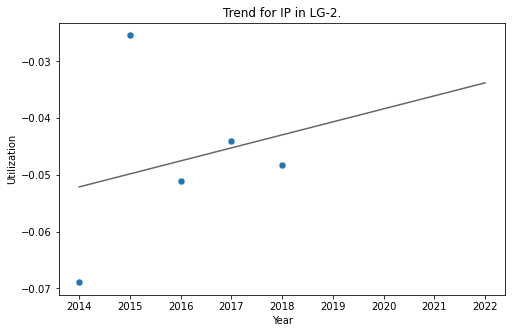

Mean: -0.04753427589773902, SD: 0.013948008838492116, R^2: 0.05396464195051076


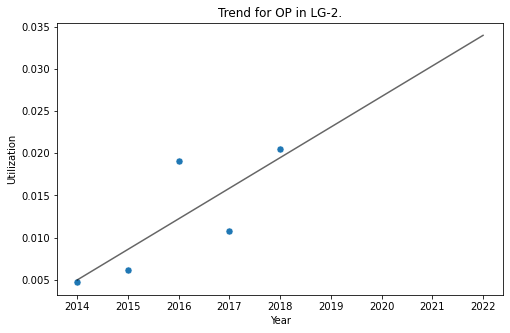

Mean: 0.012222983307884266, SD: 0.006497376784981085, R^2: 0.6220041695775105


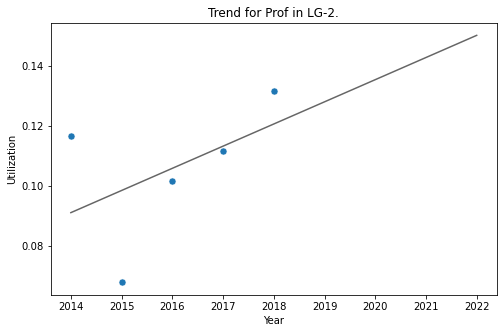

Mean: 0.10591709515190255, SD: 0.021332598087070814, R^2: 0.23927800708480995


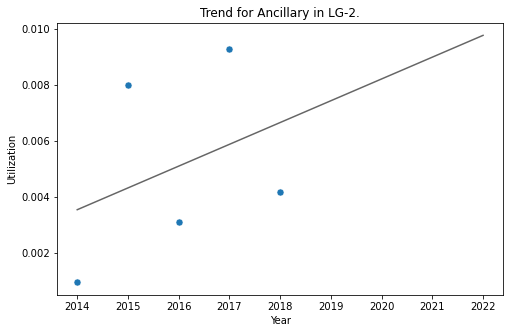

Mean: 0.005087470106324309, SD: 0.0030987364573856003, R^2: 0.12638215153972376


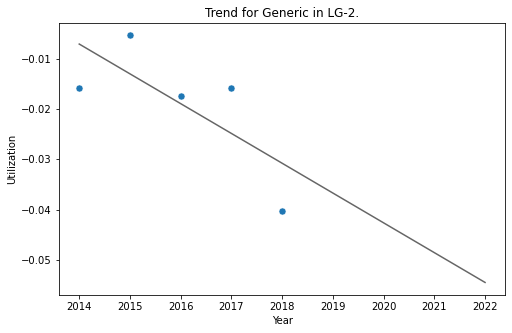

Mean: -0.01895225560106296, SD: 0.011476669607257238, R^2: 0.5320732806273805


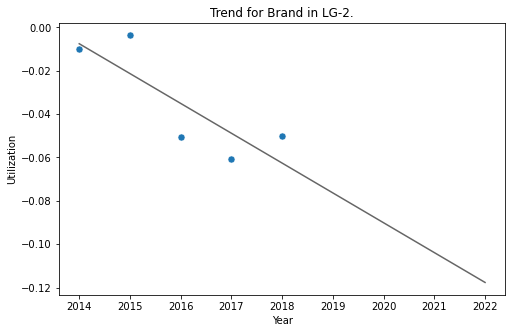

Mean: -0.03507444679451359, SD: 0.023458406564200063, R^2: 0.6883002285242008


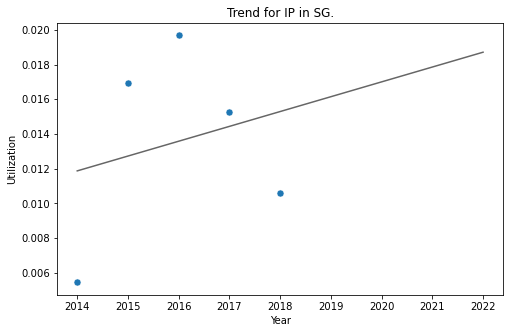

Mean: 0.013584558633149817, SD: 0.005029705268846799, R^2: 0.05767928686580481


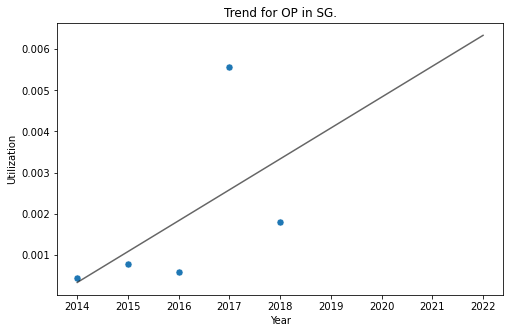

Mean: 0.001832443534689868, SD: 0.001926493768563886, R^2: 0.3037204602694634


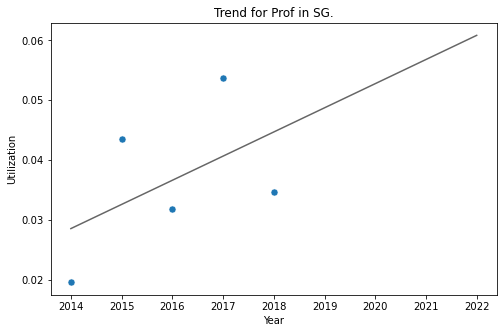

Mean: 0.036613203123545615, SD: 0.011481361607929412, R^2: 0.24727684036163233


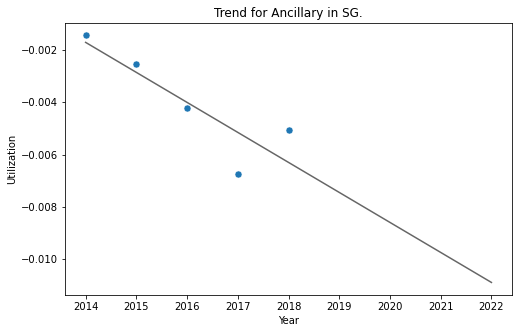

Mean: -0.0040073372974979045, SD: 0.0018683148992059118, R^2: 0.7539070183273195


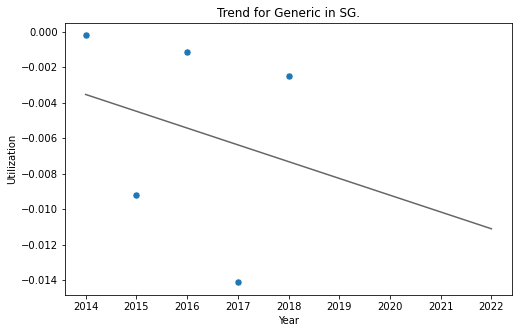

Mean: -0.005423560915459612, SD: 0.00537153469419417, R^2: 0.062036861465543325


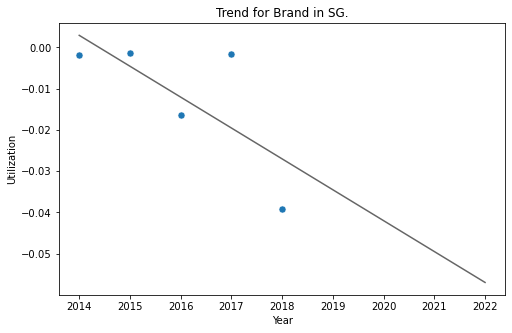

Mean: -0.01205002323989517, SD: 0.014662152933976443, R^2: 0.5208783418114808


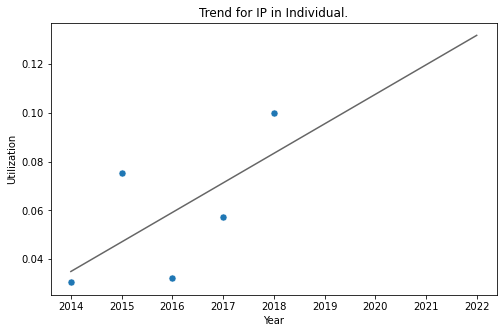

Mean: 0.05915867607031357, SD: 0.0263896311494233, R^2: 0.4218780656565314


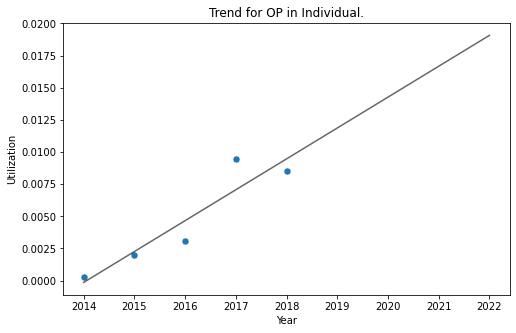

Mean: 0.004662433246541572, SD: 0.003668782003449075, R^2: 0.8573336965477161


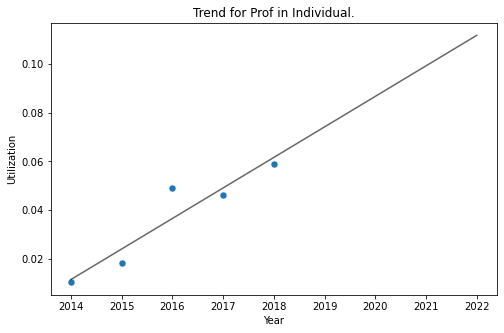

Mean: 0.036590951261244495, SD: 0.018883518224178636, R^2: 0.8809593885672512


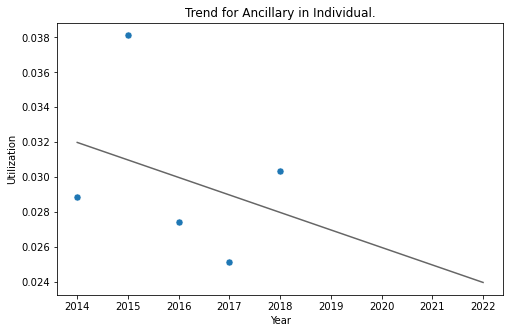

Mean: 0.02998844090793904, SD: 0.004414398462221731, R^2: 0.10283310131247736


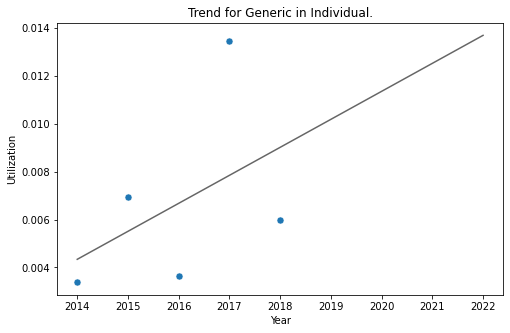

Mean: 0.006675643644987825, SD: 0.003649860906218843, R^2: 0.2049174354412947


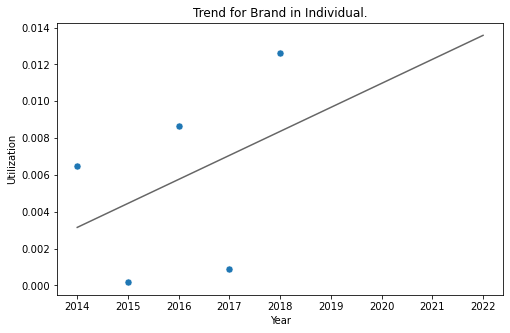

Mean: 0.005755384375790982, SD: 0.004698177166782751, R^2: 0.1538706148584108


In [40]:
remove_2019 = []
for i in markets:
    for j in services:
        simple_plot(trends_filter(i, j), "Utilization", exclude_year = [2019, 2020])
        remove_2019.append(temp_mean)

results_df["Mean without 2019"] = remove_2019

In [41]:
method_list = []

for i in range(len(results_df)):
    if results_df.iloc[i, 4] > 0.65:
        method_list.append("Regression")
    elif results_df.iloc[i, 1] == "Prof" or results_df.iloc[i, 1] == "Ancillary":
        method_list.append("Mean (w/o 2019)")
    else:
        method_list.append("Mean (with 2019)")

results_df["Method"] = method_list

In [45]:
prediction = []

for i in range(len(results_df)):
    if results_df.iloc[i, 7] == "Regression":
        prediction.append(results_df.iloc[i, 5][0])
    elif results_df.iloc[i, 7] == "Mean (w/o 2019)":
        prediction.append(results_df.iloc[i, 6])
    elif results_df.iloc[i, 7] == "Mean (with 2019)":
        prediction.append(results_df.iloc[i, 2])
        
results_df["Prediction"] = prediction

In [51]:
market_results = pd.DataFrame(columns = ["Market", "Trend"])

for i in results_df.Market.unique():
    trend = aggregate_market(results_df, i)
    market_results.loc[len(market_results)] = [i, trend]
    
total = (market_results.iloc[0, 1] * weights_market["LG-1"] + market_results.iloc[1, 1] * weights_market["LG-2"] +
         market_results.iloc[2, 1] * weights_market["SG"] + market_results.iloc[3, 1] * weights_market["Individual"])

market_results.loc[len(market_results)] = ["Total", total]

market_results

,Market,Trend
0,LG-1,0.039404
1,LG-2,-0.001778
2,SG,0.000577
3,Individual,0.029597
4,Total,0.026284


In [54]:
benefit_results = pd.DataFrame(columns = ["Benefit", "Trend"])

for i in results_df.Benefit.unique():
    trend = aggregate_benefit(results_df, i)
    benefit_results.loc[len(benefit_results)] = [i, trend]

drugs = benefit_results.iloc[4, 1] * weights_drug["Generic"] + benefit_results.iloc[5, 1] * weights_drug["Brand"]
benefit_results.loc[len(benefit_results)] = ["Drugs", drugs]

total = (benefit_results.iloc[0, 1] * weights_benefit["IP"] + benefit_results.iloc[1, 1] * weights_benefit["OP"] +
        benefit_results.iloc[2, 1] * weights_benefit["Prof"] + benefit_results.iloc[3, 1] * weights_benefit["Ancillary"] + 
        benefit_results.iloc[4, 1] * weights_benefit["Generic"] + benefit_results.iloc[5, 1] * weights_benefit["Brand"])

benefit_results.loc[len(benefit_results)] = ["Total", total]

benefit_results

,Benefit,Trend
0,IP,0.043330
1,OP,0.019609
2,Prof,0.038946
3,Ancillary,0.023435
4,Generic,0.006701
5,Brand,-0.002269
6,Drugs,-0.000812
7,Total,0.026284
